# Описание проекта  

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.  


## Содержание  


* [1.Описание данных](#данные)
* [2.Импорт библиотек и изучение общей информации](#импорт)
* [3.Подготовка данных](#ПД)
    * [3.1 Замена названий столбцов](#ПДЗС)
    * [3.2 Добавление столбца total_sales с суммарными продажами во всех регионах](#ПДНС)      
    * [3.3 Обработка пропущенных значений](#ПДПЗ)    
    * [3.4 Замена типов данных](#ПДТД)    
    * [3.5 Добавление столбца rating_cat с расшифровками значений рейтинга ESRB](#ПДЗР)     
* [4.Исследовательский анализ данных](#ИАД)
    * [4.1 График распределения количества выпускаемых игр по годам](#ИАДГ)
    * [4.2 Продажи компьютерных игр по платформам](#ИАДП)
    * [4.3 Динамика продаж игр в период с 2013 по 2016 года](#ИАДАП)    
    * [4.4 Диаграмма размаха по глобальным продажам игр с разбивкой по платформам](#ИАДДР)  
    * [4.5 Влияние отзывов на продажи внутри платформ](#ИАДКОР)
    * [4.6 Распределение продаж компьютерных игр по жанрам](#ИАДЖ)  
* [5.Составление портрета пользователя каждого региона(NA, EU, JP)](#ПП)
    * [5.1 Популярные платформы для каждого региона (топ-5)](#ППП)
    * [5.2 Популярные жанры для каждого региона (топ-5)](#ППЖ)
    * [5.3 Влияние рейтинга ESRB на продажи в регионах](#ППР)    
* [6.Статистический анализ: проверка гипотез](#гипотезы)  
    * [6.1 Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#гипотеза1)
    * [6.2 Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные](#гипотеза2)
* [7.Общий вывод](#вывод)     

# 1. Описание данных <a name="данные"></a>

## Описание данных  

•	**Name** — название игры  

•	**Platform** — платформа  

•	**Year_of_Release** — год выпуска  

•	**Genre** — жанр игры  

•	**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  

•	**EU_sales** — продажи в Европе (миллионы проданных копий)  

•	**JP_sales** — продажи в Японии (миллионы проданных копий)  

•	**Other_sales** — продажи в других странах (миллионы проданных копий)  

•	**Critic_Score** — оценка критиков (максимум 100)  

•	**User_Score** — оценка пользователей (максимум 10)  

•	**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

**Данные за 2016 год могут быть неполными.**  


## 2. Импорт библиотек и изучение общей информации <a name="импорт"></a>

In [1]:
# импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#сохраняем датафрейм в переменную  games и выводим общую информацию
games = pd.read_csv('') 

display(games.head(10))
print('*************************************')
display(games.info())
print('*************************************')
print("Число дубликатов:", games.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

*************************************
Число дубликатов: 0


**Вывод**: имеем датафрейм в котором 11 столбцов и 16715 строк  

На первый взгляд много пропусков, больше половины столбцов имеют пропущенные значения.  

Приведем названия столбцов к нижнему регистру.  

Приведём столбец **User_Score** к вещественному типу (нам нужно будет производить математические действия с ним).  

## 3.Подготовка данных <a name="ПД"></a>

• Для подготовки данных к исследованию выполним следующие шаги: 
 
•	Заменим названия столбцов (привести к нижнему регистру);  

•	Обработаем пропуски:  

       o	Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;  
       o	Опишем причины, которые могли привести к пропускам;  
       o	Разобраться, что означает аббревиатура 'tbd' в столбцах с рейтингом и описать, как обработать это значение;  
       
•	Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;  

•	Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

•	Добавимим столбец rating_cat в котором будет содержаться "расшифровка" значений рейтинга от ESRB.


* **Начнём с замены названий столбцов, приведём их к нижнему регистру** <a name="ПДЗС"></a>

In [3]:
games.columns = games.columns.str.lower()
# проверим как изменились названия
print (games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


* **Добавим столбец total_sales который будет содержать суммарные продажи по всем регионам** <a name="ПДНС"></a>

In [4]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Теперь перейдём к обработке пропущенных значений** <a name="ПДПЗ"></a>

Видим, что из 11 столбцов, столбцов без пропусков меньше половины.

Посчитаем процент пропущенных значений датафрейма "games"

In [6]:
print('Количество пропущенных значений в датафрейме "games": {:.2%}'\
      .format(sum(games.isnull().sum()) / (games.shape[0] * games.shape[1])))

Количество пропущенных значений в датафрейме "games": 11.13%


Посмотрим по столбцам

In [7]:
games.isnull().mean().sort_values(ascending=False).to_frame('isnull')

,isnull
critic_score,0.513192
rating,0.404786
user_score,0.400897
year_of_release,0.016093
genre,0.000120
name,0.000120
total_sales,0.000000
other_sales,0.000000
jp_sales,0.000000
eu_sales,0.000000


Среднее значение количества пропусков в датафрейме равно 11.13%.  

Рассмотрим и постараемся объяснить пропуски по каждому столбцу и опишем какие способы заполнения будем использовать:

* **critic_score** (оценка критиков) - пропущен 51% значений, вполне возможно, что ранее игры не оценивались критиками, т.к. тогда не было такого "обычая", возможно не все игры интересовали критиков для проведения оценки, возможно специалистов-критиков не так много и они не успевают рассматривать все выходящие игры. В любом случае было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Заполнять пропуски не будем;  

* **rating** (рейтинг от ESRB) - пропущено 40% значений, учитывая что Entertainment Software Rating Board была [основана](https://www.esrb.org/history/) в 1994 году, возможно отсутствуют рейтинги игр, которые были выпущены до 1994 года. Так как невозможно присвоить рейтинг игре, посчитав его как среднее рейтингов игр того же жанра, оставим пропуски без изменений;  

* **user_score** (оценка пользователей) - пропущено 40% значений те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги пользователей, поэтому и пропуски. Поступим так же, как и со столбцом critic_score, заменять пропуски не будем.  


Проверим наше предположение: действительно ли данные о рейтинге и оценках отсутствуют у игр преимущественно выпущенных в прошлом веке

In [8]:
games.query('rating.isnull() & critic_score.isnull() & user_score.isnull()').sort_values(by = 'total_sales', ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16242,Pet Shop Monogatari DS 2,DS,2010.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16241,NHL 16,PS3,2015.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


Странно то, что в большинстве случаев (6621 строка данных) у игр отсутствуют все 3 критерия: рейтинг, оценка игроков, оценка критиков. И среди них 4 из 10 самых продающихся игр. Если поискать информацию об этих играх в открытых источниках, можно найти и рейтинги от ESRB, и оценки критиков, и оценки пользователей, поэтому предположим, что эти данные не выгрузили в результате какой-то ошибки.   
Способ заполнения пропусков по этим столбцам оставим значение-маркер "-1"

Перейдём к анализу пропусков столбца **year_of_release**  у которого пропущено 1,6%  значений.   
Единственное логичное решение заполнения пропусков по данному столбцу, это заполнить информацией о дате выпуска этих игр на других платформах (по которым есть информация о дате выпуска).  
Но сначала проверим допущение, что игры выходят на разных платформах в один и тот же год.  
Для этого проверим выходы самых известных игр (известных широкому кругу пользователей). 

In [9]:
games.query('name == "Tetris" or name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
157,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN,5.58
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,5.07


Как видим не всегда годы выхода игр на разных платформах совпадают.  

* **year_of_release** - средними/медианами пропущенные года не заполнить. Данные по годам выпуска игр нам нужны для выделения актуального периода для анализа данных, поэтому, чтобы не допустить смещения оценок оставим пропуски без изменений.  

* **name** и **genre** - в этих столбцах пропущено всего по 2 значения, заполнять их не будем

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам.

Перед заполнением пропусков, проверим есть ли в столбцах с пропусками значения отличные от NaN

In [10]:
# напишем функцию для проверки наличия пропусков отличных от NaN
def isnull(data):
    for column in data.isna().sum().index:
        try:
            data[column].sum()
        except:
            print('Null in {}'.format(column))

In [11]:
isnull(games)

Null in name
Null in genre
Null in user_score
Null in rating


Логично, что столбцы name, genre, rating не прошли нашу проверку, так как они имеют тип данных object.  
А вот на значения столбца "user_score" стоить посмотреть поближе, чтобы понять почему он не прошел проверку и имеет тип данных object

In [12]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений столбца user_score, есть значение 'tbd', посмотрим сколько строк содержит его

In [13]:
print('Количество строк содержащих абревиатуру "tbd": {} строк'.format(games.query('user_score == "tbd"').shape[0]))

Количество строк содержащих абревиатуру "tbd": 2424 строк


Посмотрим, что означает эта абревиатура. 

Как [сказано](https://www.metacritic.com/faq#item13) на сайте metacritic.com в разделе FAQ, **абревиатура "tbd" означает To Be Determined:** "чтобы гарантировать, что METASCORES точно отражают отзывы о каком-либо конкретном фильме, игре, телешоу или альбоме, мы не показываем METASCORES для тех элементов, которые не имеют по крайней мере четырех (4) отзывов в нашей базе данных. Как только это минимальное количество отзывов будет достигнуто, на экране появится METASCORES".  

Таким образом по сути "tbd" - это отсутствие информации об оценке игр пользователями, будем считать, что это пропущенные значения и заменим на NaN

In [14]:
# заменяем tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [15]:
# приведем данные столбца user_score к типу float
games['user_score'] = games['user_score'].astype(float)

* **Добавимим столбец rating_cat в котором будет содержаться "расшифровка" значений рейтинга от ESRB**  <a name="ПДЗР"></a>

В дальнейшем при определении влияния рейтинга ESRB на продажи в регионах нам потребуется "расшифровка" значений, поэтому добавим в таблицу столбец rating_cat, который будет содержать описания значений столбца rating.  

Для начала посмотрим на уникальные значения столбца ratingю  

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Обратимся к первоисточнику: [сайту ESRB](https://www.esrb.org/ratings-guide/) и составим словарь с расшифровками имеющихся у нас значений.  

Так как рейтинг 'K-A'- это устаревшее значение рейтинга 'E', заменим его на 'E'

In [17]:
games['rating'] = games['rating'].replace('K-A', 'E')

rating_dict = {'E': 'Для всех', 'M': 'От 17 и старше', 'T': 'От 13 и старше',\
             'E10+': 'От 10 и старше', 'EC': 'От 3 и старше', 'AO': 'Только для взрослых от 18','RP':'Рейтинг ожидается'}
games['rating_cat'] = games.query('rating != -1')['rating'].map(rating_dict)

Посмотрим на информацию о датафрейме games, после наших преобразований

In [18]:
display(games.head(10))
print('*************************************')
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_cat
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Для всех
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Для всех
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Для всех
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,NaN


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
rating_cat         9949 non-null object
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


None

**Вывод:** пропущенные значения оставили практически без изменений, чтобы не смещать оценку относительно имеющихся данных, заменили значение tbd на NaN, добавили столбец с суммарными продажами и столбец rating_cat с расшифровкой рейтинга, изменили тип данных в столбце  user_score

## 4. Исследовательский анализ данных  <a name="ИАД"></a>

**Для проведения исследовательского анализа нам предстоит сделать следующее:**

•	Изучить сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  

•	Изучить как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  

•	Выбрать данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие года.  

•	Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.  

•	Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  

•	Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.  

•	Соотнести выводы с продажами игр на других платформах.  

•	Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?   


* **Посмотрим сколько игр выпускалось в разные годы** <a name="ИАДГ"></a>

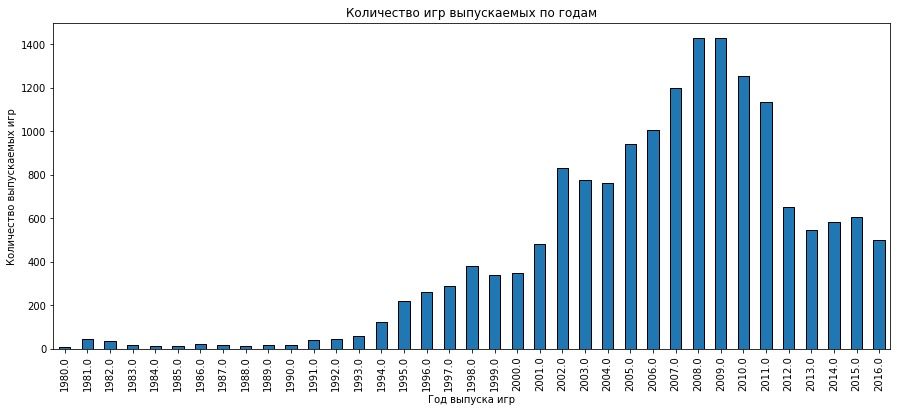

In [19]:
# построим график распределения количества выпускаемых игр по годам
games.groupby('year_of_release')['name'].count()\
.plot(y='name', kind='bar',figsize=(15,6), title = 'Количество игр выпускаемых по годам', ec='black')\
.set(xlabel = 'Год выпуска игр', ylabel = 'Количество выпускаемых игр');

С 1995 года началось массовое производство игр.  

Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году, после 2 года небольшой спад продаж и с 2005 наблюдается устойчивый рост.   

Максимальное количество игр выпущено в 2008-2009 годах.   

После этого начался спад, связанный с развитием мобильных устройств и игр на мобильных устройствах, что привело к снижению спроса пользователей и, как следствие, уменьшение предложения: сократилось производство компьютерных игр.

* **Посмотрим на продажи компьютерных игр по платформам** <a name="ИАДП"></a>

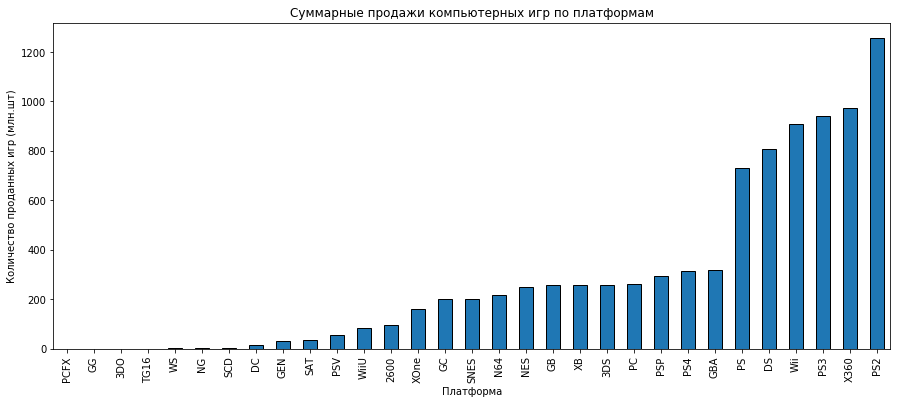

In [20]:
games.groupby('platform')['total_sales'].sum().sort_values()\
.plot(y='total_sales', kind='bar',figsize=(15,6), title = 'Суммарные продажи компьютерных игр по платформам',\
      ec='black').set(xlabel = 'Платформа', ylabel = 'Количество проданных игр (млн.шт)');

Лидером продаж является платформа PS2, затем идут X360, PS3, Wii, DS и PS, остальные платформы значительно отстают.  

Выберем топ платфом, для того, чтобы построить распределение по годам

In [21]:
games.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Возьмём для составления списка топ-платформ первые 6 строк таблицы  total_sales, так как между X360 и PS разница 240 млн.копий, а между GBA и PS разница уже значительнее (413 млн.копий)	

In [22]:
# составим список топ-платформ
top_platform_all_time = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

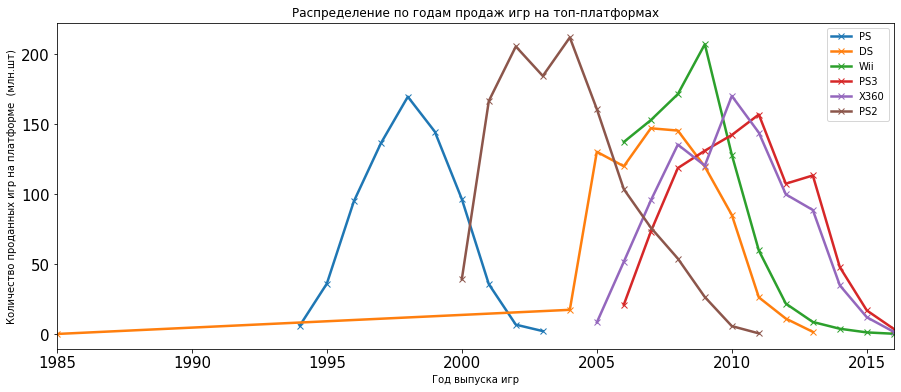

In [23]:
# построим график распределения продаж игр по платформам из топ-листа

ax = plt.gca()
for platforms in top_platform_all_time:
    plot = games.query('platform == @platforms').groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales', style='x-', kind='line', fontsize=15, linewidth=2.5,\
          label=platforms, ax=ax, figsize=(15,6), title = 'Распределение по годам продаж игр на топ-платформах')\
    .set(xlabel = 'Год выпуска игр', ylabel = 'Количество проданных игр на платформе  (млн.шт)')
  
    plt.legend(top_platform_all_time)
   

In [24]:
games.query('platform == "DS" & year_of_release < 2004').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_cat
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02,NaN


Согласно информации на официальном [сайте Nintendo](https://www.nintendo.ru/-/-Nintendo/-Nintendo-625945.html), консоль Nintendo DS была анонсирована в 2004 году.  

Shogi (сёги) - это японские шахматы, в 80-х годах 20 века начались разработки компьютерных программ, которые могут играть в сёги.  

Можно предположить, что "Strongest Tokyo University Shogi" - какая-то компьютерная игра в сёги которая разрабатывалась в Токийском Университете, но при этом она никакого отношения к платформе Nintendo DS не имеет, потому что в 1985 году этой платформы не существовало  

Учитывая то что данная строка содержит ошибочные данные, удаляем ее   

In [25]:
games = games.drop(index=[15957]).reset_index(drop=True)

Посмотрим, сколько "живут" платформы.

* **PS** - прожила с 1994 года до 2003, почти 10 лет;  

* **DS** - с 2004 года до 2013 год - 9 лет жизни;  

* **Wii** - с 2006 по настоящее время (2016 год), но продажи упали с выходом в 2012 году WiiU - 10 лет жизни;  

* **PS3** - с 2006 по настоящее время (2016 год), но продажи упали с выходом в 2013 году PS4 - 10 лет жизни;  

* **X360** - с 2005 по настоящее время (2016 год), но продажи упали с выходом в 2013 году XOne - 11 лет жизни;  

* **PS2** - с 2000 до 2011 года - 11 лет;  




Рассчитаем среднюю продолжительность жизни платформы, в расчет будем включать самые полулярные и продаваемые платформы, учитывая то, что они занимают значительную часть рынка игр

In [26]:
# создадим таблицу с данными о средней продолжительности "жизни" платформы
year_life = games.query('platform == @top_platform_all_time').\
pivot_table(index= 'platform', values='year_of_release', aggfunc=['min', 'max'])
year_life.columns = ['year_of_release', 'year_of_last_release']
year_life['year_total'] = year_life['year_of_last_release'] - year_life['year_of_release']
year_life.head(10)

,year_of_release,year_of_last_release,year_total
platform,,,
DS,2004.0,2013.0,9.0
PS,1994.0,2003.0,9.0
PS2,2000.0,2011.0,11.0
PS3,2006.0,2016.0,10.0
Wii,2006.0,2016.0,10.0
X360,2005.0,2016.0,11.0


Средний срок "жизни" платформы - 10 лет. 

Каждые 6-7 лет платфомы обновляются, выходят более новые консоли, и это неизбежно, т.к. прогресс идет вперед и аппаратное обеспечение на старых платформах перестает отвечать техническим требованиям новых игр.

**Выберем актуальный период для построения прогноза на 2017 год.**  

Ранее при изучении графика 'Количество игр выпускаемых по годам' мы обратили внимание, что на 2016 год индустрия производства компьютерных игр находится на этапе снижения потребительского спроса и как следствие снижения количества выпускаемых игр.  

Снижение рынка началось с 2010 года, посмотрим как в период с 2010 по 2016 год происходило распределение продаж игр на платформах


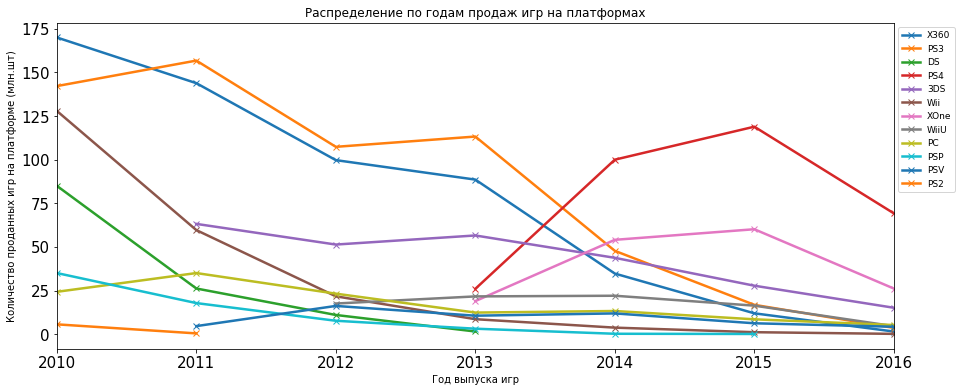

In [27]:
# построим график распределения

ax = plt.gca()

platforms = games.query('year_of_release >= 2010')['platform'].unique().tolist()
for platforms in platforms:
    plot = games.query('platform == @platforms').query('year_of_release >= 2010')\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales', style='x-', kind='line', fontsize=15, linewidth=2.5,\
          label=platforms, ax=ax, figsize=(15,6), title = 'Распределение по годам продаж игр на платформах')\
    .set(xlabel = 'Год выпуска игр', ylabel = 'Количество проданных игр на платформе (млн.шт)')
  

    
    plt.legend(platforms)
ax.legend(prop={'size': 9}, bbox_to_anchor=(1.0, 1.0));

Из графика можем увидеть, что на конец 2016 года явными лидерами продаж являются PS4, XOne и 3DS.

PS4 и XOne - вышли в 2013 году

3DS - вышла в 2011 году

**Выберем актуальным период с 2013 года по 2016 год** так как:

* в 2013 году уже вышли все популярные платформы;

* учитывая, что срок жизни платформы около 10 лет, у нас есть еще примерно 5-7 лет, когда эти платформы будут актуальны;

* данных за 4 года достаточно для того, чтобы сделать прогноз на 2017 год

Для следующих исследований создадим новый датафрейм games_new, в котором будет содержаться информация об актуальном для нас периоде с 2013 по 2016 год

In [28]:
games_new = games.query('year_of_release >= 2013')

* **Динамика продаж игр в период с 2013 по 2016 года** <a name="ИАДАП"></a>

Посмотрим какие платформы лидируют по продажам в период с 2013 по 2016 года, выберем потенциально прибыльные платформы.

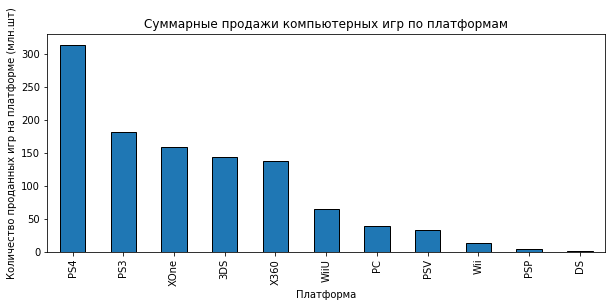

In [29]:
games_new.groupby('platform')['total_sales'].sum().sort_values(ascending = False)\
.plot(y='total_sales', kind='bar',figsize=(10,4), title = 'Суммарные продажи компьютерных игр по платформам', ec='black')\
.set(xlabel = 'Платформа', ylabel = 'Количество проданных игр на платформе (млн.шт)');

Сгруппируем данные для того, чтобы рассчитать суммарные продажи по платформам в актуальном периоде

In [30]:
games_new.groupby('platform')['total_sales'].sum().to_frame('total_sales')\
.sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


На конец 2016 года лидируют по продажам следующие актуальные платформы:

* **PS4**  

* **Xone**  

* **3DS**  

Кроме них включим в топ-лист актуальные платформы, которые вышли на рынок в 2011-2012 году:  WiiU и PSV, а так же PC (персональные компьютеры, которые актуальны всегда)	

PS3 и X360	- включать не будем, так как в 2017 году им исполнится уже 11 лет и они теряет свою актуальность  

Исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, падает (это видно из графика "Распределение по годам продаж игр на платформах").   

Таким образом, можно сказать, что весь рынок игр снижается.  



In [31]:
# формируем новый топ-лист платформ
top_platform_last_time = ['PS4', 'XOne','3DS', 'PC', 'WiiU', 'PSV']

* **Построим диаграмму размаха по глобальным продажам каждой игры с разбивкой по платформам.** <a name="ИАДДР"></a>

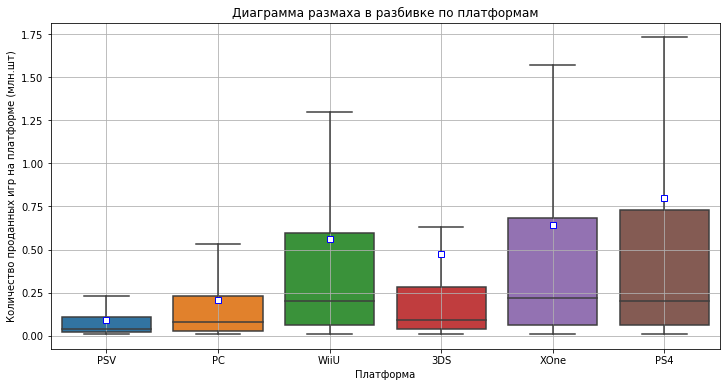

In [32]:
# строим диаграммы размаха для платформ из нового топ-листа
games_bxplt = games_new.query('platform == @top_platform_last_time')\
    .groupby('platform', as_index=False)\
    .agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=True).reset_index()

plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y= 'total_sales', data=games_new.query('platform == @top_platform_last_time'),\
            showfliers=False, order=games_bxplt['platform'].to_list(), showmeans=True,\
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})\
.set(xlabel = 'Платформа', ylabel = 'Количество проданных игр на платформе (млн.шт)')
           
plt.title('Диаграмма размаха в разбивке по платформам')
plt.grid(True)
plt.show()

Медиана по топовым платформам варьируется от 0,1 до 0,24 милионов проданных копий игр.

Верхняя граница предела, за которыми уже определяются аномалии, у трёх платформ - PS4, WiiU и XOne - на уровне выше 1,25 миллионов копий

У остальных - от 0.25 до 0.63 миллионов копий.  

Для всех диаграмм размаха характерно, что расстояние между первым квартилем и медианой заметно меньше, чем расстояние между медианой и третьим квартилем, это говорит о том, что датасет скошен  вправо, значит для данных по всем платформам справедливо утверждение, что медиана будет меньше среднего.   

Это означает, на каждой из платформ есть игры, которые являются лидерами продаж, пользуются повышенным спросом и, скорее всего, приносят значительную часть прибыли. 

Чем больше проданных копий, тем больше выручка, значит мы верно выбрали перспективные платформы

Предположим чем обоснована разница в продажах между платформами:

* **PS4** - PlayStation 4 входит в семейство игровых консолей PlayStation, которые уже более 20 лет являются лидерами на мировом рынке компьютерных игр, так как Sony японская компания они популярны и в Азии, и в Америке, и в Европе, поэтому у них самые высокие показатели по продажам  

* **XOne** - игровая приставка, разработанная и производящаяся компанией Microsoft, приставка очень популярна в Америке и Европе, но японский рынок (и азиатский в целом) им не покорился, так как, учитывая что японцы практически родоначальники компьютерных игр иностранным компаниям очень сложно зайти на азиатский рынок, он занят Sony и Nintendo.  

* **3DS** - это портативная игровая система производства Nintendo, самая популярная платформа в Японии и самая популярная "карманная" приставка в мире, но по объемам продажам она уступает PS4 и XOne. Не смотря на то, что Япония и самая играющая страна в мире, но население ее гораздо меньше Европы и Америки, а там предпочитают "стационарные" приставки  

* **WiiU** - игровая приставка производства Nintendo, очень популярна в Японии, но в остальном мире проигрывает Microsoft и Sony  

* **PC** - относительно невысокий уровень продаж игр на персональных компьютерах связан с тем, что в интернете существует большое количество пиратских копий игр для PC, кроме того, собрать компьютер для игры гораздо дороже, чем купить игровую приставку. Покупатели игр для компьютеров - это истинные ценители компьютерных игр  

* **PSV** - PlayStation Vita входит в семейство портативных игровых консолей PlayStation, несмотря на то, что она вышла в один год с 3DS, не смогла "перебить" ее по популярности.   

Так же не стоит забывать, что платформы PS4 и XOne только вышли на рынок в начале выбранного актуального периода (в 2013 году) и этим тоже можно обосновать всплеск продаж игр для этих платформ

* **Оценим как влияют отзывы на продажи внутри платформы** <a name="ИАДКОР"></a>

Оценивать будем на основе платформы PS4 - она вышла в 2013 году, по ней много данных, на конец 2016 года она является самой популярной игровой платформой.  

Построим диаграммы рассеяния, показывающие взаимосвязь между отзывами и продажами  

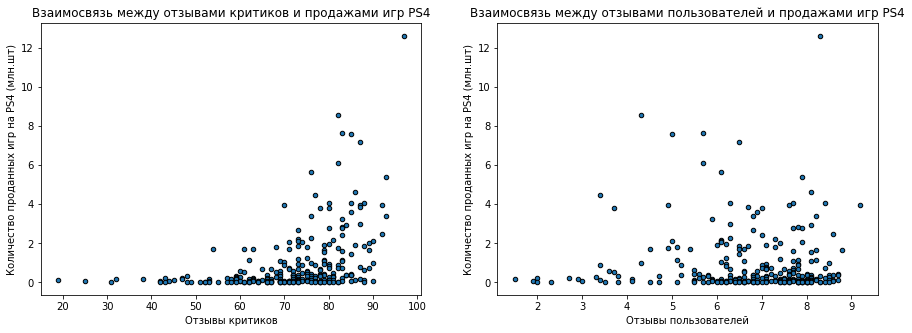

In [33]:
rows = 1
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,5))
score_list = ['critic_score', 'user_score']
games_ps4 = games_new.query('platform == "PS4"')

count = 0
for r in range(rows):
    for i in range(cols):
        title_dict = {'critic_score':'Взаимосвязь между отзывами критиков и продажами игр PS4', 'user_score':'Взаимосвязь между отзывами пользователей и продажами игр PS4'}
        xlabel_dict = {'critic_score':'Отзывы критиков', 'user_score':'Отзывы пользователей'}
        ax = games_ps4.plot(kind = 'scatter', x = score_list[count], y = 'total_sales',\
                            ax=axes[i], ec='black', title = title_dict[score_list[count]])\
        .set(xlabel = xlabel_dict[score_list[count]], ylabel = 'Количество проданных игр на PS4 (млн.шт)')
        count += 1

С увеличением среднего рейтинга критиков увеличивается и количество проданных копий, что логично: чем качественнее игра, тем лучше она продаётся.   

В целом ситуация с отзывами пользователей так же говорит о том, что чем выше рейтинг, тем больше копий продано, но не всегда.  

Мы видим много выбросов, показывающих высокие продажи и довольно низкие рейтинги игр, думаю это связано с тем, что пользователь может оценить игру только после совершения покупки, и не всегда остаётся доволен купленной игрой, выражая своё разочарование в низких оценках игре

Посчитаем корреляцию между отзывами и продажами, построим матрицу корреляции

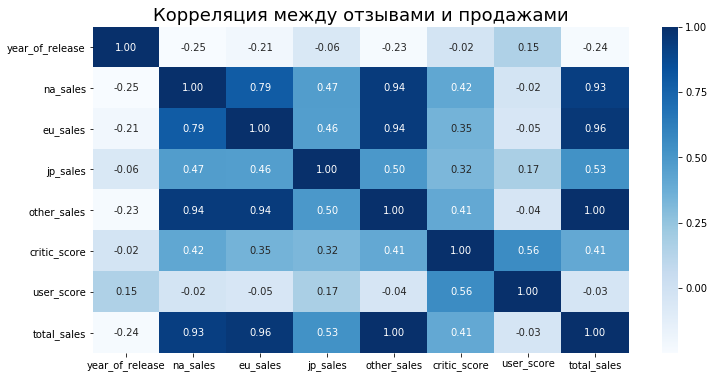

In [34]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(games_ps4.corr(), annot=True, cmap="Blues", fmt='.2f')
ax.set_title('Корреляция между отзывами и продажами', fontsize=18);

Выделим нужные нам данные

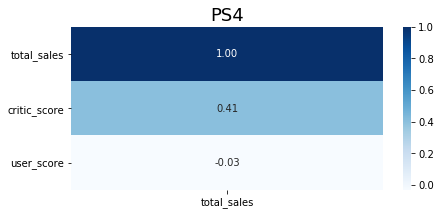

In [35]:
plt.figure(figsize=(7,3))
ax = sns.heatmap(games_ps4[['total_sales', 'user_score', 'critic_score']].corr()[['total_sales']]\
                 .sort_values(by='total_sales', ascending=False), annot=True, cmap="Blues", fmt='.2f')
ax.set_title('PS4', fontsize=18);

Больше всего на количество продаж влияет оценка критиков.   

Оценка игры пользователем с количеством проданных копий имеет незначительную отрицательную корреляцию, что можно объяснить тем, что уже купив игру (т.е. увеличив продажи), пользователь может оказаться недоволен игрой и поставить ей низкую оценку, так же не стоит забывать , что платформе всего 3 года, возможно еще нет достаточного количества отзывов     

Посмотрим как будут коррелировать отзывы и продажи на остальных платформах из топ-листа

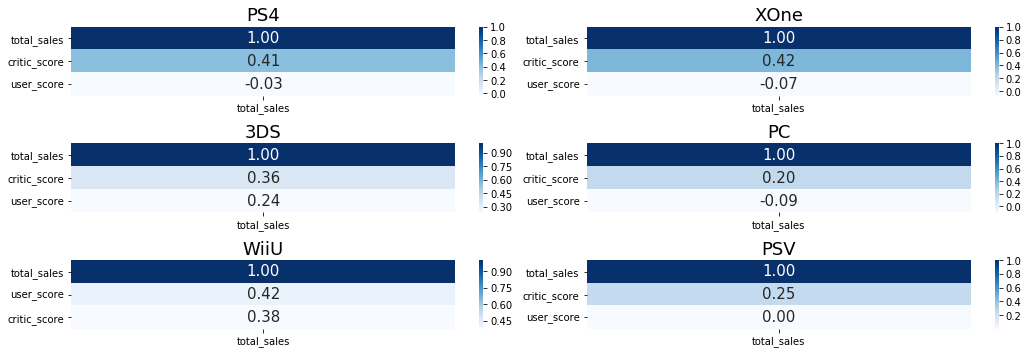

In [36]:
rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,5))

count = 0
for r in range(rows):
    for c in range(cols):
        count_platform = top_platform_last_time[count]
        games_platform = games_new[(games_new['platform'] == count_platform)]
        games_platform_filt = games_platform[['total_sales', 'critic_score', 'user_score']]
        ax = sns.heatmap((games_platform_filt.corr()[['total_sales']].sort_values(by='total_sales', ascending=False)), ax = axes[r,c], annot=True, cmap="Blues", fmt='.2f', annot_kws={'size':15});
        ax.set_title(count_platform, fontsize=18)
        plt.tight_layout(pad=1)
        count += 1


Данные по корреляции между выручкой и оценкой по платформе XOne практически совпадают с выводами по PS4: значительная корреляция продаж с оценками критиков и практически отсутствие корреляции с оценками пользователей  

Для персональных компьютеров (PC) и консоли PSV зависимость продаж от оценок критиков уже гораздо меньше  

Выделяются WiiU и 3DS, по которым зависимость продаж от оценки пользователями и от оценок критиков практически одинаковые, а в случае с WiiU корреляция с оценками пользователей выше, чем с оценками критиков.

Могу предположить, что это связано с тем что WiiU и 3DS - это продукты компании Nintendo, которая является лидером продаж на японском рынке, делает действительно качественные продукты, которые высоко ценят, как критики, так и потребители игр (либо преданные фанаты Nintendo из Японии поддерживают производителями высокими оценками).


* **Посмотрим на распределение продаж игр по жанрам**<a name="ИАДЖ"></a>

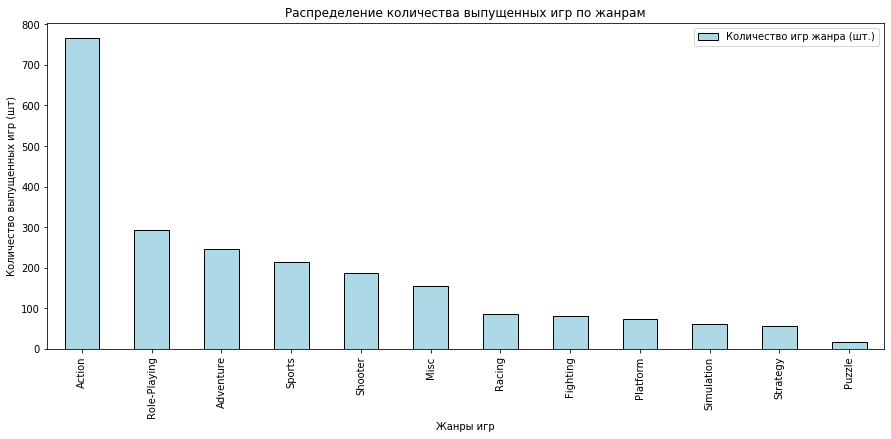

In [37]:
# постороим график с распределением по жанрам количества выпущенных игр

games_new.pivot_table(index= 'genre', values='name', aggfunc='count').sort_values(by = 'name', ascending = False)\
.plot(kind='bar',figsize=(15,6), title = 'Распределение количества выпущенных игр по жанрам',\
      color='lightblue',ec='black', width=0.5).set(xlabel = 'Жанры игр', ylabel = 'Количество выпущенных игр (шт)')
plt.legend(['Количество игр жанра (шт.)']);

Самое большое количество выпускаемых игр относится к жанру Action, на втором месте - Role-Playing, на третьем - Adventure 

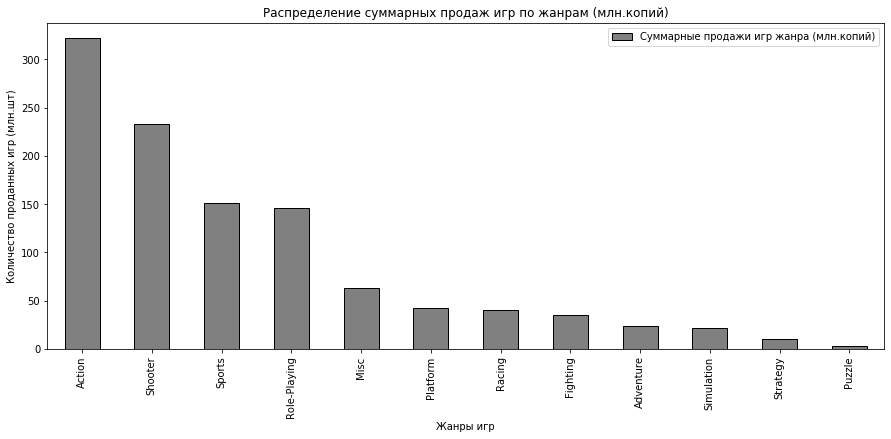

In [38]:
games_new.pivot_table(index= 'genre', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False)\
.plot(kind='bar',figsize=(15,6), color='grey',ec='black', width=0.5,\
      title = 'Распределение суммарных продаж игр по жанрам (млн.копий)')\
.set(xlabel = 'Жанры игр', ylabel = 'Количество проданных игр (млн.шт)');
plt.legend(['Суммарные продажи игр жанра (млн.копий)']);

В количестве проданных копий на первом месте так же Action, на втором - Shooter, третье поделили Sports и Role-Playing

Больше всего выпущено игр жанра Action.   

За ними идут ролевые игры Role-Playing и приключения - Adventure. 

Что же касается количества проданных игр, то тут на первом месте так же игры жанра Action, а вот на втором - игры жанра Shooter

Несмотря на то что "стрелялок" производится почти в 4 раза меньше чем  экшн-игр, по количеству продаваемых игр Shooter ненамного отстает от Action

Как итог, игр Shooter производится относительно немного (возможно из-за того, что их производство дорогое), но они очень популярны

Опишем отдельно топ по количеству выпускаемых игр и по количеству продаваемых игр.


Топ-3 жанров по количеству выпускаемых игр:

* **Action**  

* **Role-Playing**

* **Adventure**


Топ-3 жанров по количеству продаваемых игр:

* **Action**  

* **Shooter**

* **Sports** и **Role-Playing**


**Вывод:**   

* актуальный период для исследования: 2013 - 2016 года

* самые популярные платформы на конец 2016 года - PS4, XOne, 3DS  

* Средний срок "жизни" платформы - 10 лет  

* Продажи игр в большей степени зависят от отзывов критиков и в меньшей степени (или совсем не зависят) от отзывов пользователей

* Самые полулярные жанры: Action, Shooter, Sports и Role-Playing


## 5.Составление портрета пользователя каждого региона(NA, EU, JP) <a name="ПП"></a>

•	Для составления портрета пользователя определим для каждого региона(NA, EU, JP):  

       •	Самые популярные платформы (топ-5).   
       •	Самые популярные жанры (топ-5).   
       •	Влияние рейтинга ESRB на продажи в отдельном регионе    
       
Для начала опишем функцию для прорисовки графиков

In [39]:
def region_func(column):
    rows = 1
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(18,5))
    region_list = ['na_sales', 'eu_sales', 'jp_sales']
    count = 0
    for r in range(rows):
        for i in range(cols):
            data = games_new.pivot_table(index=column, values = region_list[count], aggfunc = 'sum')\
            .sort_values(by=region_list[count], ascending = False)[:5]
            title_dict = {'na_sales': 'Продажи в Северной Америке (млн.копий)',\
                          'eu_sales': 'Продажи в Европе (млн.копий)', 'jp_sales': 'Продажи в Японии (млн.копий)'}
            color_dict = {'na_sales': 'lightblue', 'eu_sales': 'gray', 'jp_sales': 'lightgreen'}
            plot = data.plot(kind='bar', ec='black', title=title_dict[region_list[count]], ax=axes[i],\
                             fontsize=13, color=color_dict[region_list[count]], rot=45)
            plot.set_xlabel('')
            count += 1

* **Популярные платформы для каждого региона (топ-5)** <a name="ППП"></a>

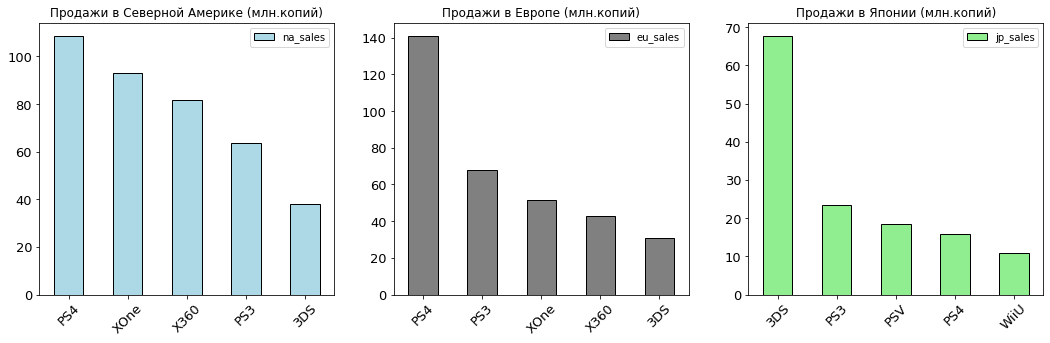

In [40]:
region_func('platform')

* **Северная Америка** - имеют большую популярность платформы PS4, XOne и X360, немного отстает PS3.   
Несмотря на то, что Sony признанный мировой лидер в производстве приставок, в Америке не отстает по продажам "местный" производитель Microsoft. 
Думаю если просуммировать продажи игр для  PS4 и PS3 - сумма будет примерно равна суммарным продажам XOne и X360, т.е. в Америке Xbox и PlayStation примерно одинаково популярны

* **Европа** однозначно лидирует PlayStation, в основном продаются игр для PS4 и PS3

* **Япония** явный фаворит 3DS, за ним с большим отрывом PS3 и PSV - это связано с тем, что в Японии портативные консоли гораздо популярнее стационарных, что можно объяснить двумя факторами:  
    * японцы любят миниатюрные, облегчённые электронные устройства (ярким свидетельством этому служит аудиоплеер Walkman)  
    * японцы привыкли пользоваться портативными игровыми устройствами в транспорте, они много времени проводят в дороге и перемещаются обычно на поездах. В Токио, например, обычная поездка занимает около часа в одну сторону. 

* **Популярные жанры для каждого региона (топ-5)**<a name="ППЖ"></a>

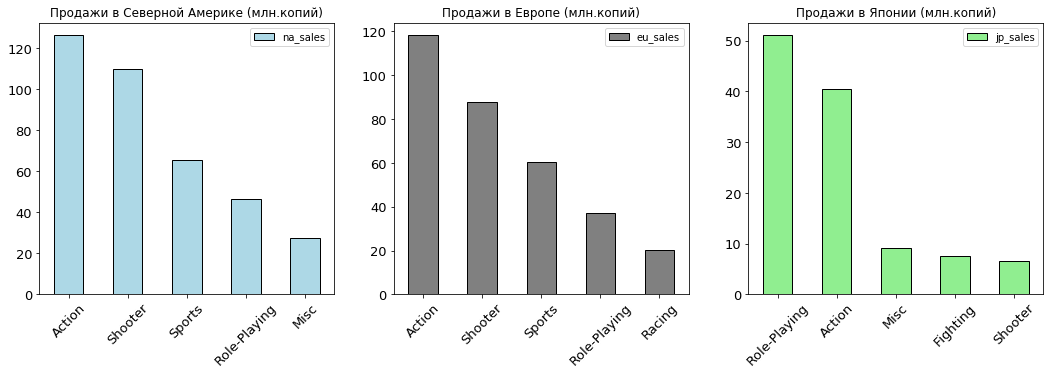

In [41]:
region_func('genre')

Что касается жанров, здесь тройка лидеров в Северной Америке и Европе совпадают: Action, Shooter, Sports  

В Японии с большим отрывом лидируют ролевые игры Role-Playing, затем Action и Miscellaneous  

Вот как объясняет такое отличие японцев в предпочтениях жанров [аналитик игр Хирабаяси Хисакадзу](https://www.nippon.com/ru/in-depth/a04103/?pnum=1#): японцы, судя по всему, склонны предпочитать деформированное отображение реальности, не слишком симпатизируя фотореалистичному изображению... Если Соединённые Штаты (где очень популярны игры жанра "Shooter") — «страна ствола», то Японию с её культурой самураев следует назвать «страной клинка». В противоположность США, популярным игровым жанром в Японии — «стране клинка» — стали ролевые игры. Развитие персонажа, которым становится игрок, происходит вместе с эволюцией его клинка — от палки к кинжалу, длинному мечу, и, наконец, к прославленному мечу с собственным именем. 

 * **Влияние рейтинга ESRB на продажи в регионах** <a name="ППР"></a>

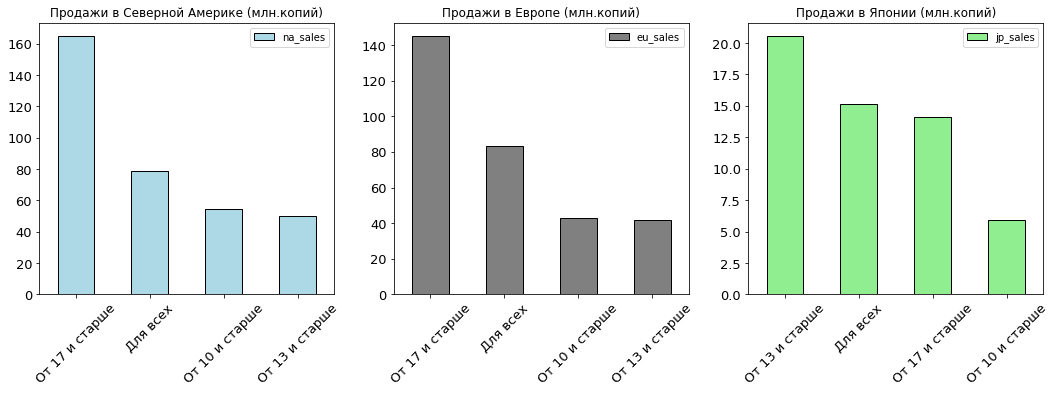

In [42]:
region_func('rating_cat')

По рейтингам картина такая: в Северной Америке и Европе лидируют игры с рейтингом "От 17 и старше", на втором месте "Для всех", на третьем - "От 10 и старше". В Америке и Европе в основном играют взрослые люди. 

В Японии: на первом месте игры с рейтингом "От 13 и старше", на втором месте "Для всех", и только на третьем - "От 17 и старше", играть в Японии начинают с раннего возраста и самые популярные жанры не связаны с насилием, поэтому и рейтинги игр довольно "мягкие"

**Вывод:**

* **Портрет пользователя из Северной Америки** - чаще покупает игры с рейтингом "М"; жанра Action, Shooter, Sports; играет на платформах PS4 и XOne 

* **Портрет пользователя из Европы** - чаще покупает игры с рейтингом "М"; жанра Action, Shooter, Sports; играет в основном на платформах PS4   

* **Портрет пользователя из Японии** - чаще покупает игры с рейтингом "T"; жанра Role-Playing или Action; играет на платформах 3DS

В Америке и Европе в основном предпочитают стационарные игровые приставки PlayStation и Xbox, чаще играют подростки и взрослые, предпочитая более жесткие игры с рейтингом "От 17 и старше" и жанрами Action, Shooter

Японцы играют в основном на портативных консолях 3DS, предпочитая ролевые игры, которые не содержат насилия и как следствие имеют более мягкий рейтинг 

## 6. Статистический анализ: проверка гипотез <a name="гипотезы"></a>

Для проверки у нас две гипотезы:  

       •	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
       •	Средние пользовательские рейтинги жанров Action и Sports разные.  

* **Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые** <a name="гипотеза1"></a>

В формулировке гипотезы идёт речь о сравнении двух средних генеральных совокупностей для независимых переменных, сформулируем нулевую гипотезу:  

**H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Альтернативная гипотеза:  

**H1 - средние пользовательские рейтинги платформ Xbox One и PC различны**  

Сначала построим диаграммы размаха

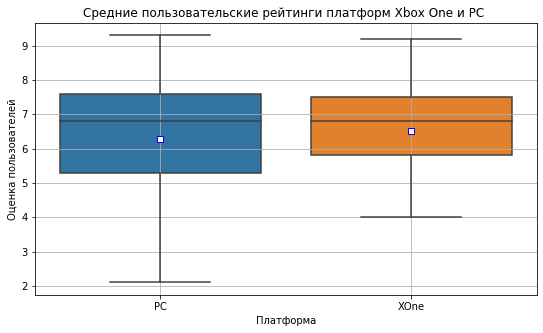

In [43]:
df = games_new.query('platform == "XOne" or platform == "PC"')
games_bxplt = df.groupby('platform', as_index=False)\
    .agg({'user_score':'sum'})\
    .sort_values(by='platform', ascending=True).reset_index()

plt.figure(figsize=(9,5))
sns.boxplot(x='platform', y= 'user_score', data=df, showfliers=False, order=games_bxplt['platform'].\
            to_list(),showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})\
.set(xlabel = 'Платформа', ylabel = 'Оценка пользователей') 
           
plt.title('Средние пользовательские рейтинги платформ Xbox One и PC ')
plt.grid(True)
plt.show()

Судя по диаграмме размаха, средние значения пользовательских рейтингов платформ PC и Xbox One практически на одном уровне, это даёт нам основание предположить, что "нулевую гипотезу" отвергнуть не получится.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать t-критерий Стьюдента, т.к. выборки независимы между собой.   

Определим пороговое значение alpha = 0.05  

Применим метод scipy.stats.ttest_ind (array1, array2,equal_var).  

Посчитаем дисперсии выборок, для того, чтобы определить параметр equal_var

In [44]:
games_xbo = games_new.query('platform == "XOne" & user_score != "NaN"')['user_score']
games_pc = games_new.query('platform == "PC" & user_score != "NaN"')['user_score']

print('Дисперсия выборки по платформе  Xbox One: {:.5f}'.format(np.var(games_xbo, ddof = 1)))
print('Дисперсия выборки по платформе  PC: {:.5f}'.format(np.var(games_pc, ddof = 1)))

Дисперсия выборки по платформе  Xbox One: 1.90700
Дисперсия выборки по платформе  PC: 3.03589


Дисперсии выборок различны, значит задаем параметр equal_var = False

In [45]:
alpha = 0.05 
results = st.ttest_ind(games_xbo, games_pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Наши данные не противоречат нулевой гипотезе: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**   

Проверим на нашей выборке различаются ли средние значения пользовательских рейтингов платформ Xbox One и PC

In [46]:
print('Средний пользовательский рейтинг платформы Xbox One - {:.2f}'.format(games_xbo.mean()))
print('*******************************************************')
print('Средний пользовательский рейтинг платформы PC - {:.2f}'.format(games_pc.mean()))

Средний пользовательский рейтинг платформы Xbox One - 6.52
*******************************************************
Средний пользовательский рейтинг платформы PC - 6.27


Разница в 0.25 балла при оценке платформ пользователями не является статистически значимой

* **Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные** <a name="гипотеза2"></a>

В формулировке гипотезы идёт речь о сравнении двух средних генеральных совокупностей для независимых переменных, сформулируем нулевую гипотезу:  

**H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые**

Альтернативная гипотеза:  

**H1 - средние пользовательские рейтинги жанров Action и Sports различны**  

Построим диаграммы размаха

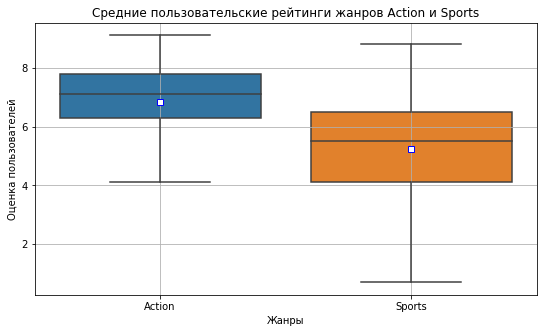

In [47]:
df = games_new.query('genre == "Action" or genre == "Sports"')
games_bxplt = df.groupby('genre', as_index=False)\
    .agg({'user_score':'sum'})\
    .sort_values(by='genre', ascending=True).reset_index()

plt.figure(figsize=(9,5))
sns.boxplot(x='genre', y= 'user_score', data=df, showfliers=False, order=games_bxplt['genre'].to_list(),showmeans=True,\
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})\
.set(xlabel = 'Жанры', ylabel = 'Оценка пользователей') 
           
plt.title('Средние пользовательские рейтинги жанров Action и Sports')
plt.grid(True)
plt.show()

Судя по диаграмме размаха, средние значения пользовательских рейтингов жанра Action выше чем у Sports, это даёт нам основание предположить, что "нулевую гипотезу" можно будет отвергнуть, проверим наше предположение.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать t-критерий Стьюдента, т.к. выборки независимы между собой.   

Определим пороговое значение alpha = 0.05  

Применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

Посчитаем дисперсии выборок

In [48]:
games_action = games_new.query('genre == "Action" & user_score != "NaN"')['user_score']
games_sports = games_new.query('genre == "Sports" & user_score != "NaN"')['user_score']

print('Дисперсия выборки по  жанру Action: {:.5f}'.format(np.var(games_action, ddof = 1)))
print('Дисперсия выборки по жанру Sports: {:.5f}'.format(np.var(games_sports, ddof = 1)))

Дисперсия выборки по  жанру Action: 1.76936
Дисперсия выборки по жанру Sports: 3.18061


Дисперсии выборок различны, значит задаем параметр equal_var = False

In [49]:
alpha = 0.05 
results = st.ttest_ind(games_action, games_sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Наши данные не противоречат альтернативной гипотезе: **средние пользовательские рейтинги жанров Action и Sports различны**  

Проверим на нашей выборке на сколько отличаются средние значения пользовательских рейтингов жанров Action и Sports   

In [50]:
print('Средний пользовательский рейтинг жанра Action - {:.2f}'.format(games_action.mean()))
print('*******************************************************')
print('Средний пользовательский рейтинг жанра Sports - {:.2f}'.format(games_sports.mean()))

Средний пользовательский рейтинг жанра Action - 6.84
*******************************************************
Средний пользовательский рейтинг жанра Sports - 5.24


Пользователи выше оценивают игры в жанре Action

**Вывод:**  

* Наши данные не противоречат гипотезе: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**    

* Наши данные не противоречат гипотезе: **средние пользовательские рейтинги жанров Action и Sports различны**  

## 7.Общий вывод <a name="вывод"></a>

* Больше всего на продажу игр влияют оценки критиков, поэтому следует обратить внимание на игры с высокими рейтингами от критиков. 

* Оценки пользователей такого "влияния" на продажи не оказывают.

* Самые продаваемые жанры Action, Shooter, Sports и Role-Playing

* По платформам лидируют PS4, XOne и 3DS, но надо помнить, что срок жизни платформы примерно 10 лет и каждые 6-7 лет они обновляются

* Самая продаваемая категория игр - категория "M" ("От 17 и старше")

Так же не стоит забывать о составленных портретах пользователей каждого региона:

* **Портрет пользователя из Северной Америки** - чаще покупает игры с рейтингом "М"; жанра Action, Shooter, Sports; играет на платформах PS4 и XOne 

* **Портрет пользователя из Европы** - чаще покупает игры с рейтингом "М"; жанра Action, Shooter, Sports; играет в основном на платформах PS4   

* **Портрет пользователя из Японии** - чаще покупает игры с рейтингом "T"; жанра Role-Playing или Action; играет на платформах 3DS

Исходя из этих выводов и стоит разрабатывать стратегию на следующий год

В целом рынок компьютерных игр падает в связи с развитием рынка игр на мобильных устройствах.
